<a href="https://colab.research.google.com/github/mpapada2/Class0/blob/master/Quiz2_mpapada2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

The first thing we can do is split the MSE expression into a sum of sums because anything that, for example, is in G1 will go to zero in the G0 summation.

I can show how to do this with two regressors and from there it can extrapolated to more regressors. We can redefine the betas as follows:
$$\beta_1 = \gamma_1$$
$$\beta_2 = \gamma_2 - \gamma_1$$
Substitute them into the MSE expression: 
$$\sum_{i=1} (Y_i - \gamma_1 - (\gamma_2 - \gamma_1)X_i)^2  $$

$$\sum_{i=1} (Y_i - \gamma_1(1-X_i) - \gamma_2X_i)^2  $$

If we the split the sum into two sums over their respective groups then if we say X is in G1, its value will be 1 when summing over G1 but the values not in G0 ie (1-X) will be 0. Thus we get:

$$\sum_{i=1, i\in\mathbb{G1}} (Y_i - \gamma_1)^2\ + \sum_{i=1, i\in\mathbb{G2}} (Y_i - \gamma_2)^2$$

This can be extrapolated to this problem to say:

$$\sum_{i=1, i\in\mathbb{G1}} (Y_i - \beta_1)^2\ + \sum_{i=1, i\in\mathbb{G2}} (Y_i - \beta_2)^2 + ... \sum_{i=1, i\in\mathbb{Gk}} (Y_i - \beta_k)^2$$

Therefore each $$\beta_k$$ is predicting each $$Y_k$$ and because the best predictor for data points all in the same x group when we have no information about y will be the average of those data points we now that 
$$\beta_k = Y_k(mean)$$.


#Problem 2

beta0 =-694.1809221478507
beta1 =1.0675677731655158
sample error rate=832740.3005383236


Text(0, 0.5, 'Volume of Diencephalon_R')

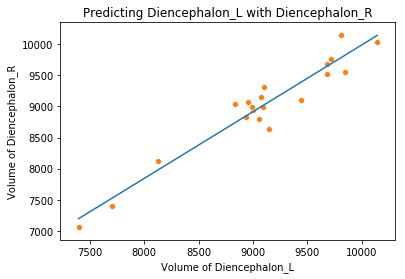

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

! if [ ! -e kirby21.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi
  
df = pd.read_csv("/content/kirby21.csv")
TL = df.volume[df.roi == 'Diencephalon_L'][df.type == 1][df.level == 1].to_numpy()
TR = df.volume[df.roi == 'Diencephalon_R'][df.type == 1][df.level == 1].to_numpy()
sns.scatterplot(TR,TL)

beta1 = st.pearsonr(TR,TL)[0]*np.std(TL)/np.std(TR)
beta0 = np.mean(TL) - np.mean(TR)*beta1
sns.scatterplot(TR,TL)
sns.lineplot(TR,beta0 +beta1 * TR)
plt.title('Predicting Diencephalon_L with Diencephalon_R')
error_list = []
for i in range(len(TL)):
  error_rate = (TL[i] - beta0 - beta1*TR[i])**2
  error_list.append(error_rate)
print("beta0 =" + str(beta0))
error_rate = sum(error_list)
print("beta1 =" + str(beta1))
print("sample error rate=" + str(error_rate))
plt.xlabel('Volume of Diencephalon_L')
plt.ylabel('Volume of Diencephalon_R')


#Problem 3

Use the dataset "Newspaper Endorsements of Presidential Candidates" to relate number of endorsements to if a candidate wins or loses. I could use a logistic regression.
